# Исследование о закономерностях, влияющих на успешность игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Датафрейм имеет следующую структуру:
1. Name — название игры 
2. Platform — платформа 
3. Year_of_Release — год выпуска 
4. Genre — жанр игры 
5. NA_sales — продажи в Северной Америке (миллионы долларов) 
6. EU_sales — продажи в Европе (миллионы долларов) 
7. JP_sales — продажи в Японии (миллионы долларов) 
8. Other_sales — продажи в других странах (миллионы долларов) 
9. Critic_Score — оценка критиков (максимум 100) 
10. User_Score — оценка пользователей (максимум 10) 
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования - выявить закономерности, определяющие успешность игры.

Ход исследования:
1. Открою файл с данными (/datasets/games.csv) и изучу общую информацию.
2. Проведу предобработку данных.
3. Посчитаю и добавлю в таблицу новые данные.
4. Проведу анализ факторов, влияющих на успешность продажи игр.
5. Составлю портреты пользователей для крупных регионов продаж.
6. Выполнить проверку гипотез.
7. Сформулирую общий вывод.

## Откройте файл с данными и изучите общую информацию.¶

In [1]:
# импортирую нужные библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходные данные содержат 16715 наблюдений (строк) и 10 характеристик (столбцов). В первом столбце содержится порядковый номер наблюдения. Мы наблюдаем большое количество пропущенных значений в столбцах 'ctitic_score', 'user_score' и 'rating'. Также пропущенные значения наблюдаются в столбце 'year_of_release'. 5 характеристик имеют тип данных object (строковые переменные), 6 - float64 (числа с плавающей точкой). К категориальным переменным относятся: 'Name', 'Platform', 'Genre', 'User_Score', 'Rating'(необходимо отметить, что корректно в дальнейшем поменять тип данных для переменной 'User_Score'). Количественные переменные: 'Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales','Critic_Score' (необходимо отметить, что корректно в дальнейшем поменять тип данных для переменной 'Year_of_Release' c типа float на тип int). 

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Исходя из таблицы можно сделать вывод, что данные содержат большое количество аномальных значений. Например, минимальное значение переменных 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales' равно 0, т.е. минимальное количество продаж по представленным регионам равно 0. 

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

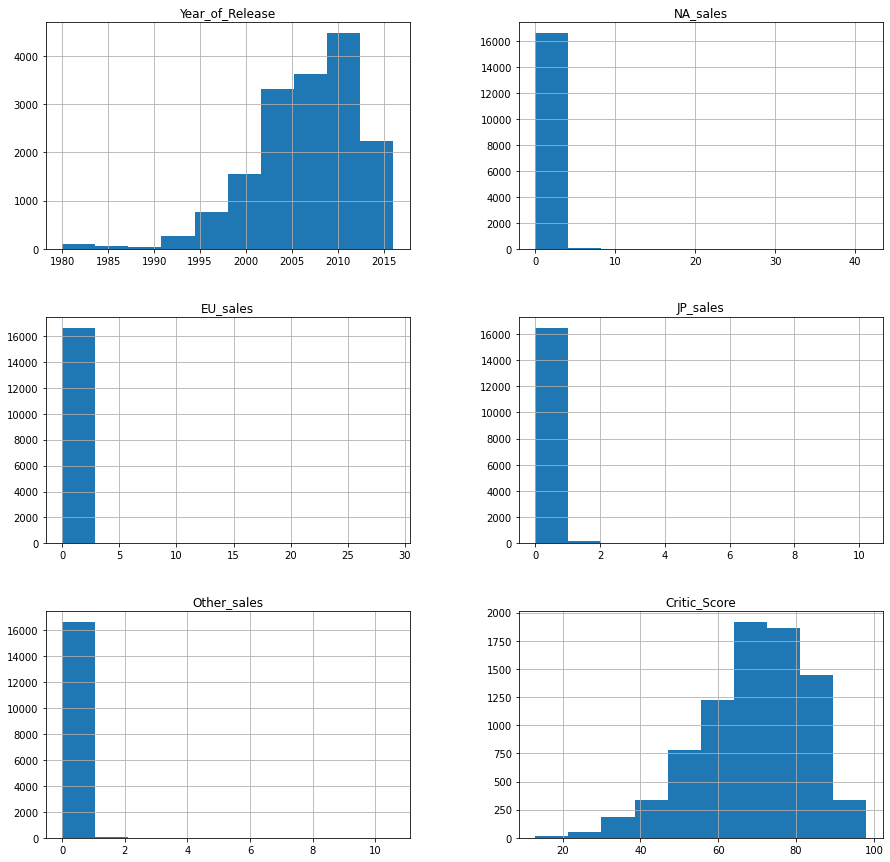

In [5]:
df.hist(figsize=(15,15))

Проверила данные на дубликаты

In [6]:
df.duplicated().sum()

0

## Предобработка данных.

### Изменение названия столбцов (приведение к нижнему регистру).

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков и Преобразование данных в нужные типы.

In [8]:
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: object
['name' 'platform' 'genre' 'user_score' 'rating']

Type: float64
['year_of_release' 'na_sales' 'eu_sales' 'jp_sales' 'other_sales'
 'critic_score']



In [9]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Изенения требуют столбцы:

1. 'year_of_release' и 'critic_score' в тип int. 
2. 'user_score' в тип float. Столбцу 'user_score' присвоен тип object, так как присутствует строковое значение 'tbd', что расшифровывается как to be determined - будет определено и означает, что сейчас идет оценивание и по факту оценка отсутствует, поэтому все 'tbd' можно заменить на NaN.

In [10]:
# перед тем, как изменять тип данных, необходимо избавиться от пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

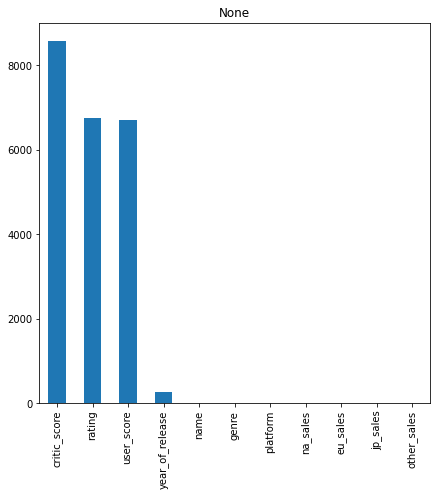

In [11]:
df.isna().sum().sort_values(ascending = False).plot.bar(subplots=True, figsize=(7, 7))

In [12]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Исходя из представленных выше данных можно заметить, что больше всего пропущенных значений в переменной critic_score. Из 16715 значений пропущено 8578, что является почти 51% пропусков. Кроме того, переменные user_score и rating содержат большое количество пропусков (около 40%). Такое большое количество пропусков может быть объяснено  тем, что процесс оценки игр может быть достаточно длительным или вообще может не состояться, а крупные агенства по рейтингу игр могут не оставить оценку.

In [13]:
# заменим пропуски в столбце 'rating' на значение 'unknown', так как мы самостоятельно не сможем определить рейтинг
df['rating'] = df['rating'].fillna('unknown')

In [14]:
# удаляем пропущенные значения в данных столбцах, так как мы не сможем заменить данные пропуски
df = df.dropna(subset = ['year_of_release', 'genre', 'name'])

Обработаем значения tbd.

   

In [15]:
# все 'tbd' заменяем на NaN
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

В столбцах critic_score и user_score много пропущенные значений, поэтому не корректно заменять пропуски средним или медианным значением из-за искажения данных. Поэтому заменю пропуски в данных столбцах на -1.

In [16]:
df['user_score'] = df['user_score'].fillna(-1)
df['critic_score'] = df['critic_score'].fillna(-1)

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors ='coerce')
df['user_score'] = df['user_score'].round(1)

In [18]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [19]:
df['critic_score'] = df['critic_score'].astype('int')

### Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец.

In [20]:
df['total_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31


### Проведение исследовательского анализа данных

In [21]:
#  количество игр, выпущенных в разные годы
year_of_release_pivot_table = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['games_count']
year_of_release_pivot_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

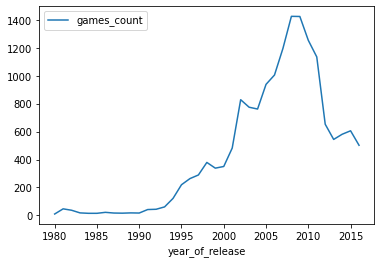

In [22]:
year_of_release_pivot_table.plot()

Данные за все периоды не нужны, так как исходя из представленного графика до начала 2000-х выпускалось мало игр. Значительный рост пришел на начало 21 века в связи с научно-техническим прогрессом. Пик популярности видеоигр пришел на 2009 год, что может быть связано с тем, что больше людей в мире стали приобретать персональные компьютеры. Значительный спад произошел в 2010-2016 гг.

In [23]:
# изменение продаж по платформам
platform_sales_pivot_table = pd.pivot_table(df, index=['platform'], values='total_sales', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('total_sales',ascending=False)
platform_sales_pivot_table

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


К наиболее популярным платформам с наибольшими суммарными продажами относятся PS2, X360, PS3, Wii, DS и PS.	

In [24]:
best_sales_platform = list(platform_sales_pivot_table.index[:6])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [25]:
for platform in best_sales_platform:
    print('Платформа ',platform)
    platform_sales_pivot_table = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    print(platform_sales_pivot_table)
    print()

Платформа  PS2
                          total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45

Платформа  X360
                          total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014     

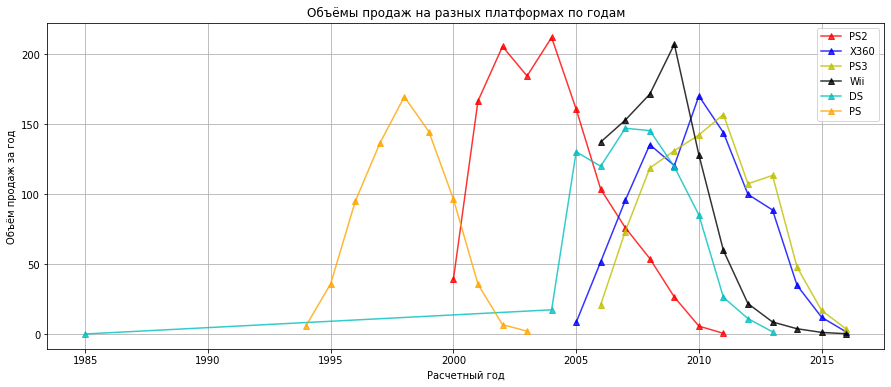

In [26]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']

plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
for i in range(0,len(best_sales_platform)):
    platform  = df.query('platform == @best_sales_platform[@i]').groupby('year_of_release')['total_sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i], \
                  label=best_sales_platform[i], alpha=0.8, grid=True);
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();


In [27]:
mean_year_life/len(best_sales_platform)

11.166666666666666

Cрок использования популярных платформ в среднем равен 11 лет. 

Изменила актуальный период и взяла данные за 2012-2016 гг.

In [28]:
# Возьмем данные за соответствующий актуальный период - 2012-2016 гг. Так как было выделено в предыдущем задании - средний срок использования популярных платформ равен 11 лет.
actual_df = df.query('year_of_release >= 2012')
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


In [29]:
actual_df_platform = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').\
    query('year_of_release>=2012').fillna(0).reset_index()
for column in actual_df_platform.columns:
    if actual_df_platform[column].sum()==0:
        actual_df_platform.drop(column, axis=1,inplace=True)

display(actual_df_platform)

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


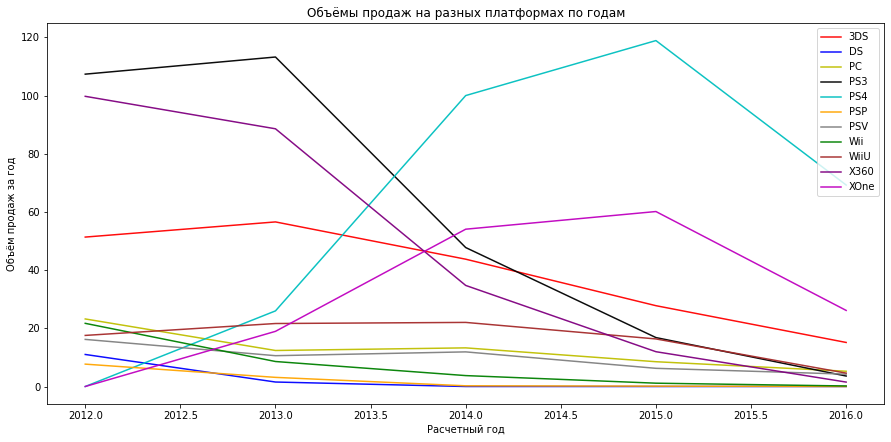

In [30]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in actual_df_platform.columns[1:]:
    plt.plot(actual_df_platform['year_of_release'].to_list(), actual_df_platform[column].to_list(), label=column, color=color[i], alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

Многие популярные платформы (Wii, PS3, X360, PSP) прошли свой цикл развития 11 лет и 2016 год является завершающим для них, поэтому в данные платформы вкладываться не стоит. 
Однако, есть платформы, такие как PS4 и XOne, которые появились в 2013 году и уже в 2014 и 2015 продемонстрировали рост. Необходимо развивать данные платформы.


### Глобальные продажи игр в разбивке по платформам

In [31]:
top2017 = actual_df.query('year_of_release>=2012').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
top2017

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [32]:
top2017 = actual_df.query('year_of_release >= 2012 & platform in ["PS4", "XOne", "3DS", "WiiU", "PS3", "PC", "X360", "PSV", "Wii", "PSP"]')
top2017

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01


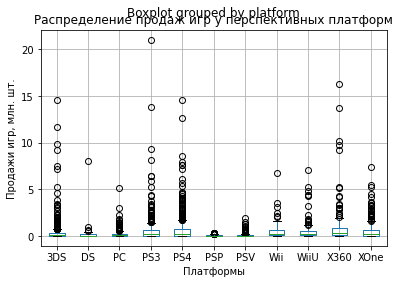

In [33]:
ax = actual_df.boxplot('total_sales', by='platform')
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

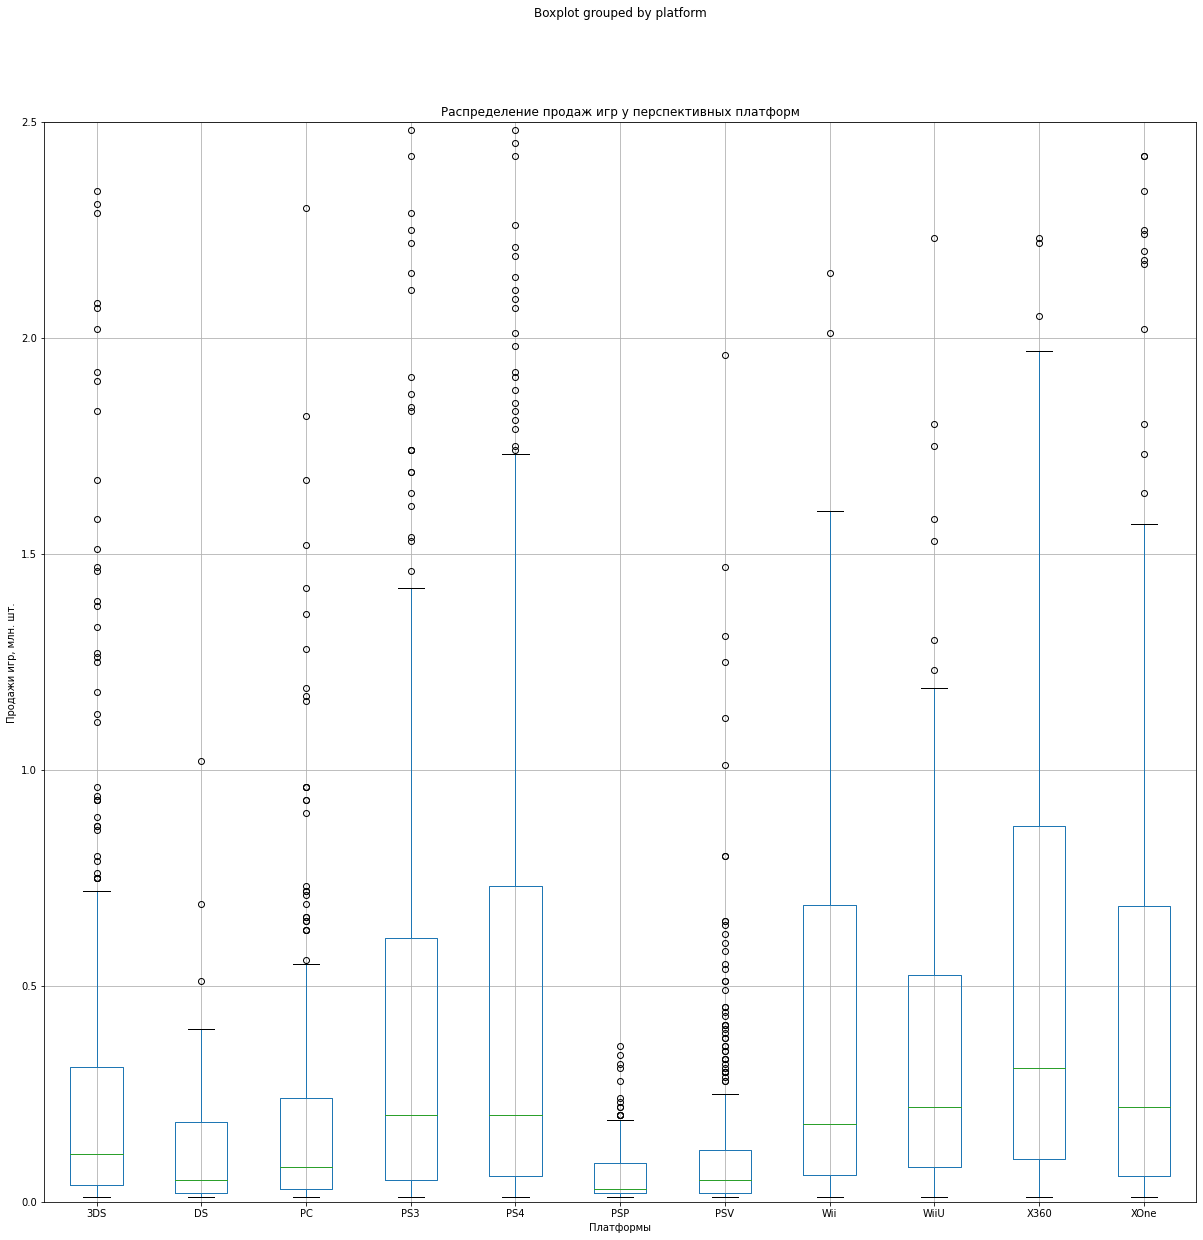

In [34]:
# Из-за того, что много выбросов, построим boxplot с ограничением.
ax = actual_df.boxplot('total_sales', by='platform', figsize = (20,20))
ax.set_ylim(0, 2.5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Платформы')
ax.set_title('Распределение продаж игр у перспективных платформ')
plt.show()

Исходя из представленного "ящика с усами" можно сделать вывод, что самое высокое медианное значение продаж у платформы X360. На втором месте - платформа XOne. Самое низкое медианное значение - у платформы PSP. При этом у многих платформ (таких как PSV, 3DS и др.) наблюдается много игр-выбросов.

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

In [35]:
PS4 = actual_df.query('year_of_release >= 2012 & platform=="PS4"')[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
PS4

,total_sales,critic_score,user_score
0,14.63,-1,-1.0
1,12.62,97,8.3
2,8.58,82,4.3
3,7.98,-1,-1.0
4,7.66,83,5.7
...,...,...,...
387,0.01,69,7.5
388,0.01,-1,-1.0
389,0.01,61,7.9
390,0.01,51,5.5


Заменим обратно значения critic_score и user_score, равные -1, на NaN, чтобы они не искажади значения коэффициентов корреляции

In [36]:
PS4 = PS4.replace([-1], np.nan)
PS4

,total_sales,critic_score,user_score
0,14.63,NaN,NaN
1,12.62,97.0,8.3
2,8.58,82.0,4.3
3,7.98,NaN,NaN
4,7.66,83.0,5.7
...,...,...,...
387,0.01,69.0,7.5
388,0.01,NaN,NaN
389,0.01,61.0,7.9
390,0.01,51.0,5.5


In [37]:
PS4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

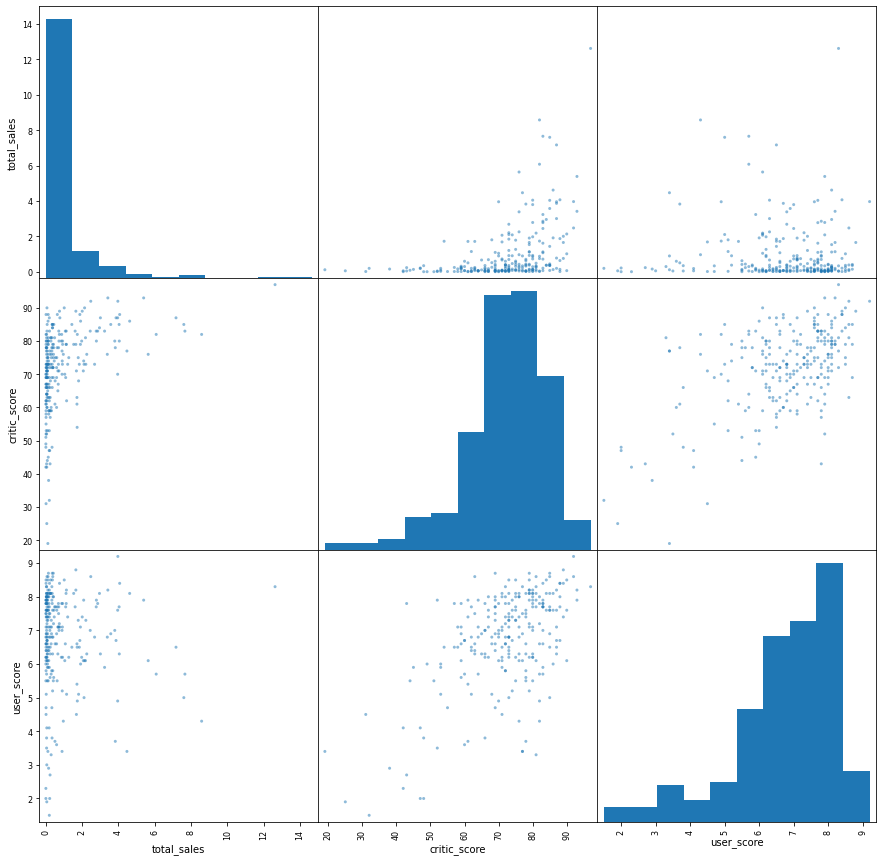

In [38]:
pd.plotting.scatter_matrix(PS4, figsize=(15, 15))

Мы можем наблюдать прямую слабую корреляцию между прибылью и оценкой критиков, а также очень слабую обратную корреляцию между прибылью и оценкой пользователей, что не носит смысла. При этом наблюдается средняя взаимосвязь между оценкой критиков и оценкой пользователей.

### Соотнесем выводы с продажами игр на других платформах

/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


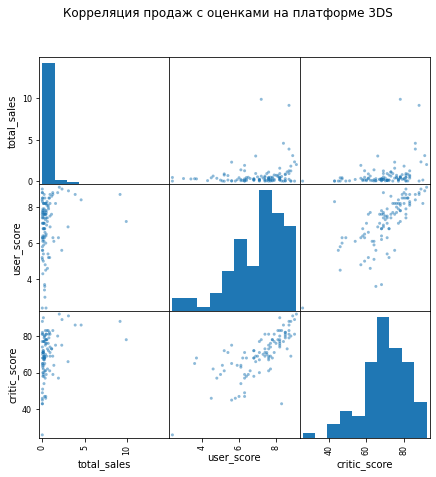

,total_sales,user_score,critic_score
total_sales,1.000000,0.197583,0.320803
user_score,0.197583,1.000000,0.722762
critic_score,0.320803,0.722762,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 80.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 80.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


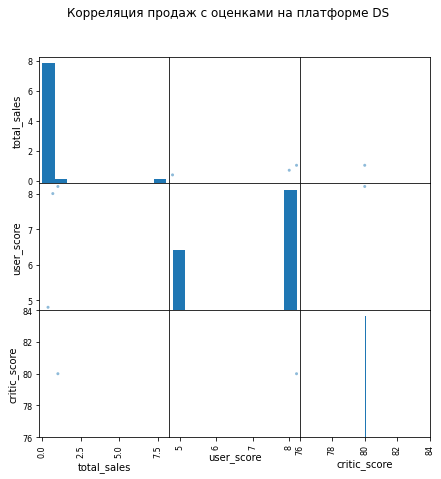

,total_sales,user_score,critic_score
total_sales,1.000000,0.882709,NaN
user_score,0.882709,1.000000,NaN
critic_score,NaN,NaN,NaN


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


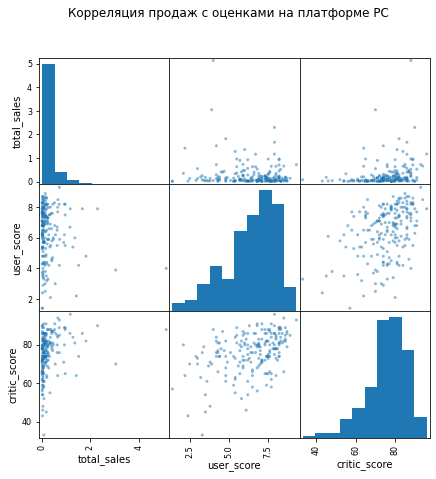

,total_sales,user_score,critic_score
total_sales,1.000000,-0.121867,0.237243
user_score,-0.121867,1.000000,0.432587
critic_score,0.237243,0.432587,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


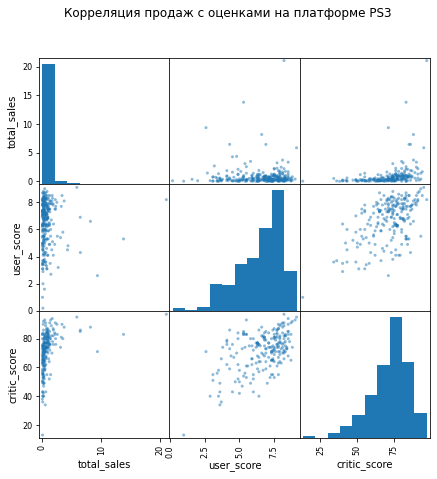

,total_sales,user_score,critic_score
total_sales,1.000000,-0.005144,0.331497
user_score,-0.005144,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 74.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 74.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 74.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


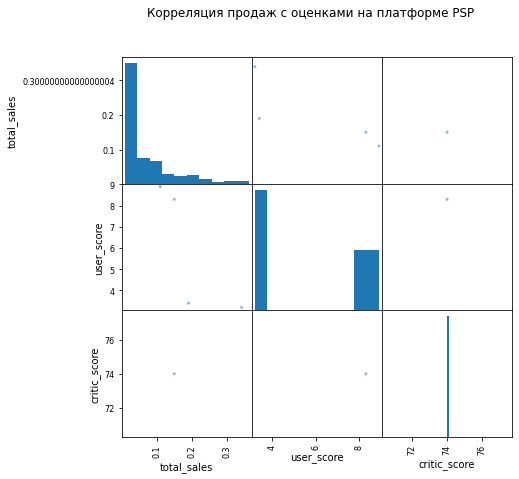

,total_sales,user_score,critic_score
total_sales,1.000000,-0.802302,NaN
user_score,-0.802302,1.000000,NaN
critic_score,NaN,NaN,NaN


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


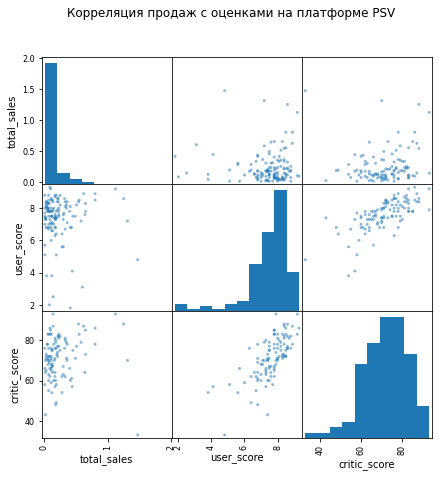

,total_sales,user_score,critic_score
total_sales,1.000000,-0.004339,0.094488
user_score,-0.004339,1.000000,0.699199
critic_score,0.094488,0.699199,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


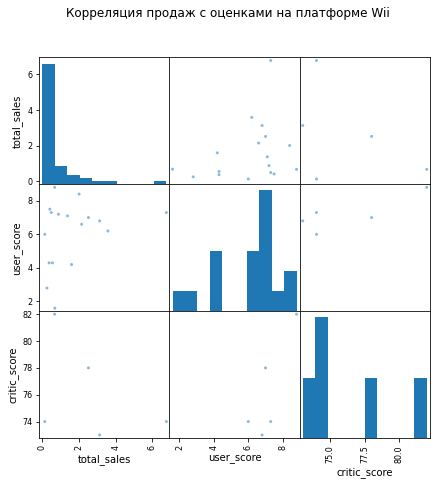

,total_sales,user_score,critic_score
total_sales,1.000000,0.296197,-0.424341
user_score,0.296197,1.000000,0.816295
critic_score,-0.424341,0.816295,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


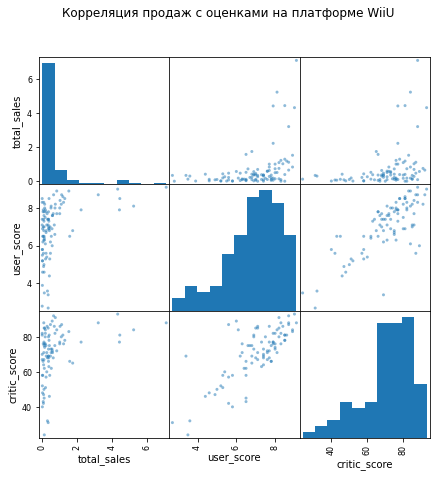

,total_sales,user_score,critic_score
total_sales,1.000000,0.400219,0.34838
user_score,0.400219,1.000000,0.77008
critic_score,0.348380,0.770080,1.00000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


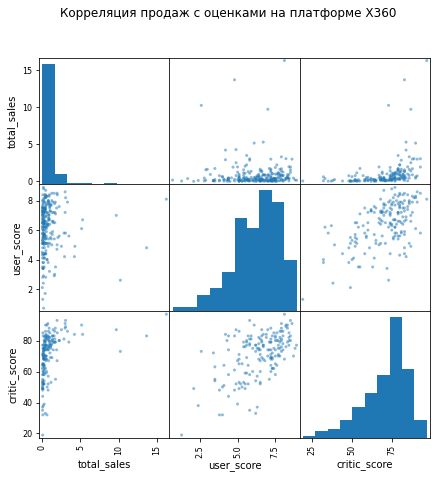

,total_sales,user_score,critic_score
total_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


/tmp/ipykernel_64/1026938370.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data, ax=ax)


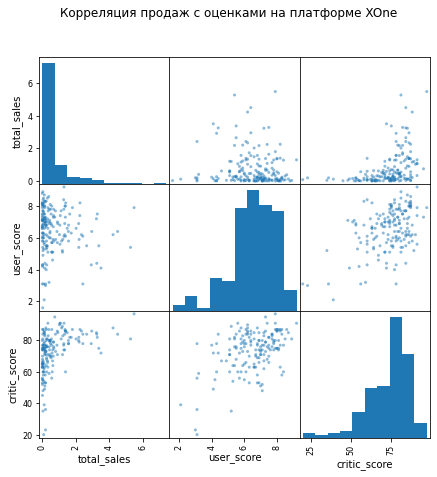

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


In [39]:
actual_df_nan = actual_df.replace([-1], np.nan) #заменим -1 на Nan
platform_list = ['3DS', 'DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

for platform in platform_list:
    data = actual_df_nan.query('platform == @platform')[['total_sales','user_score', 'critic_score']]
    
    fig, ax = plt.subplots(figsize = (7,7))
    pd.plotting.scatter_matrix(data, ax=ax)
    fig.suptitle(f'Корреляция продаж с оценками на платформе {platform}')
    plt.show()   
    
    display(actual_df_nan.query('platform == @platform')[['total_sales','user_score', 'critic_score']].agg('corr'))
    

### Общее распределение игр по жанрам

In [40]:
# Количество игр по жанрам
genres = actual_df.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: name, dtype: int64

In [41]:
# Количество продаж по жанрам
sales = actual_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
sales

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

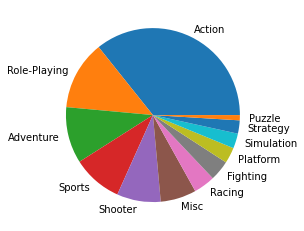

In [42]:
mylabels = genres.index
plt.pie(genres, labels = mylabels)
plt.show() 

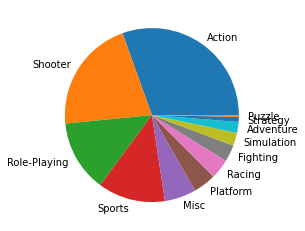

In [43]:
mylabels = sales.index
plt.pie(sales, labels = mylabels)
plt.show() 

<AxesSubplot:title={'center':'total_sales'}, xlabel='genre'>

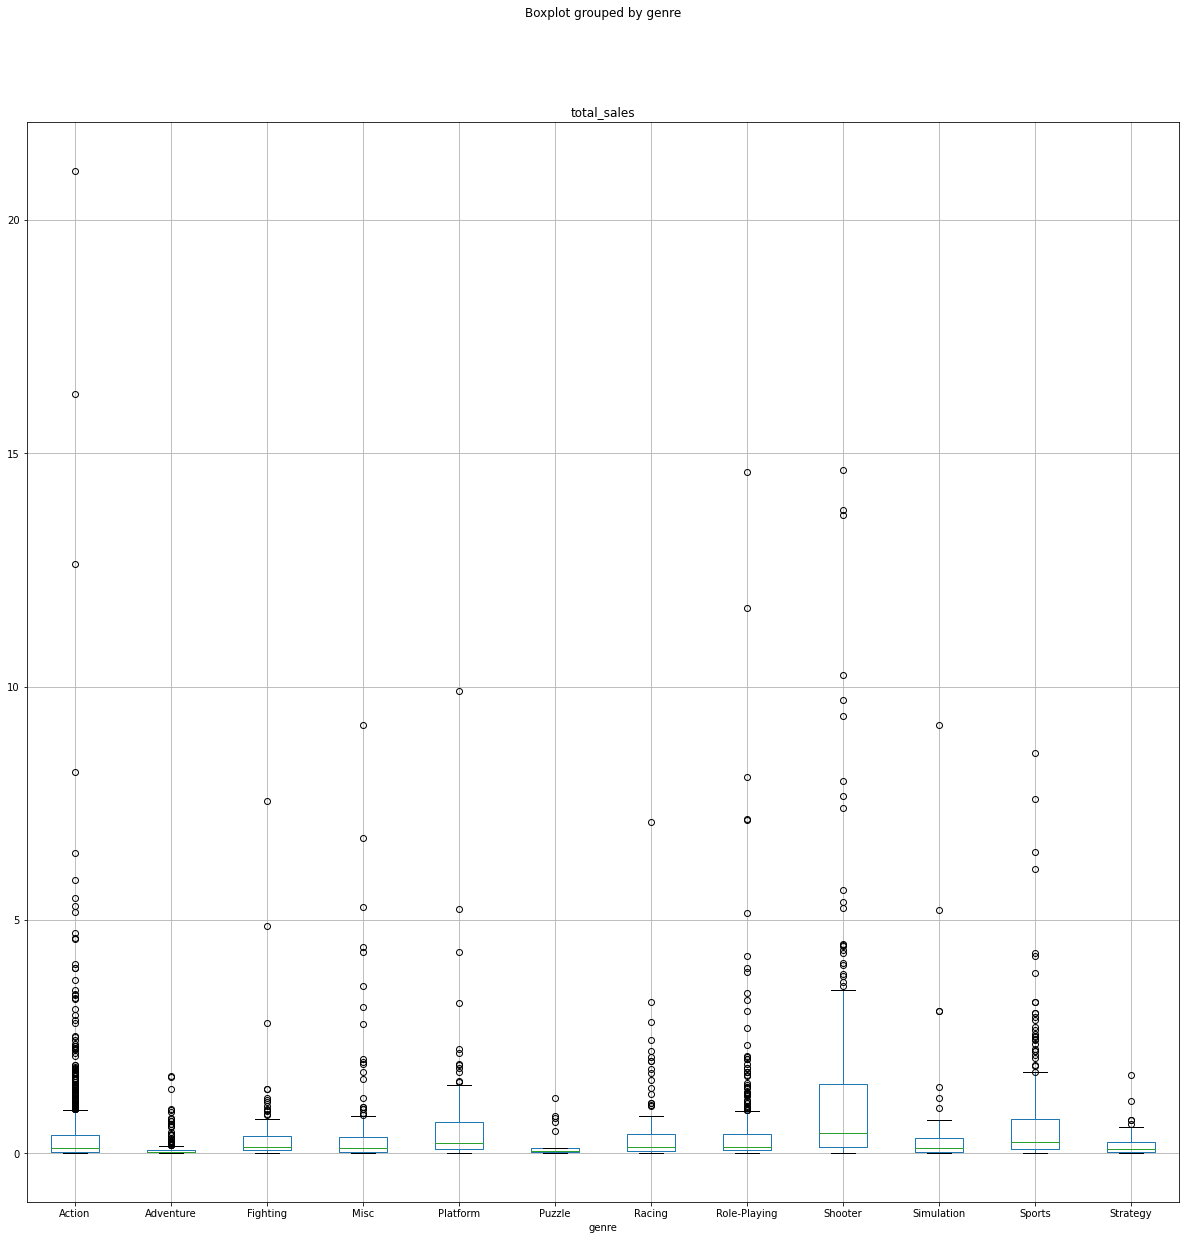

In [44]:
actual_df.boxplot(column='total_sales', by='genre', figsize=(20, 20))

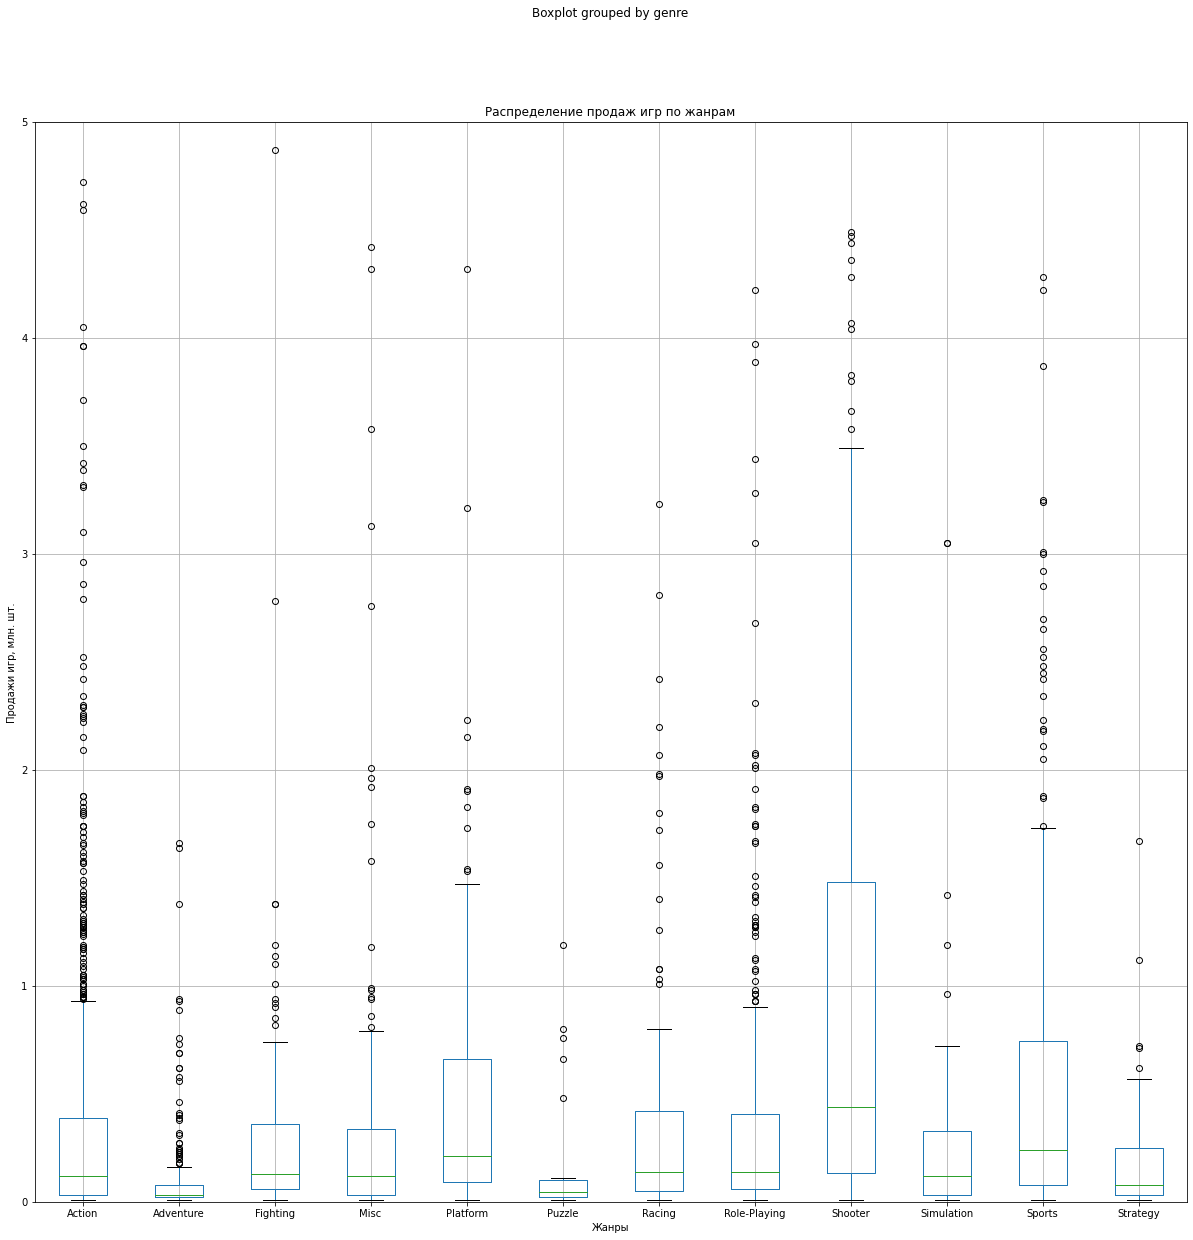

In [45]:
# Из-за того, что много выбросов, построим boxplot с ограничением, по которому ниже проведем сравнение.
ax = actual_df.boxplot('total_sales', by='genre', figsize = (20,20))
ax.set_ylim(0, 5)
ax.set_ylabel('Продажи игр, млн. шт.')
ax.set_xlabel('Жанры')
ax.set_title('Распределение продаж игр по жанрам')
plt.show()

    Распределение игр по жанрам является следующим: лидируют Action, Role-Playing, Adventure и Sports; наименее популярные жанры -  Puzzle, Strategy и Simulation.
    В продажах по жанрам лидируют также Action, Shooter, Role-Playing и Sports; наименее популярные жанры по продажам: Strategy, Puzzle и Adventure. 
    Исходя из выше представленного "ящика с усами" можно отметить, что у жанра Shooter самое высокое медианное значение, несмотря на то, что по количеству продаж данный жанр не лидирует. В то время, как у жанра Action, который лидирует по суммарной прибыли, медианное значение достаточно низкое. При этом, необходимо отметить большое количество выбросов-игру жанра Shooter, что обуславливает достаточно высокую суммарную прибыль.

### Составим портрет пользователя каждого региона (NA, EU, JP).

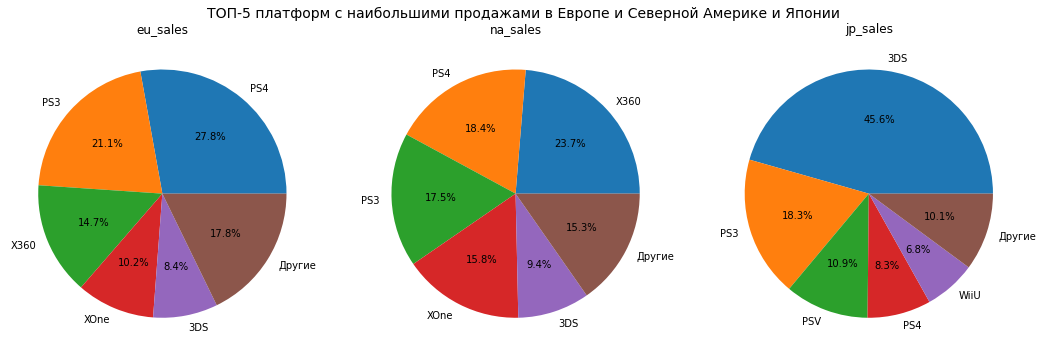

In [46]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = actual_df.query('year_of_release >= 2012').groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['platform'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 платформ с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

Лидеры продаж во всех регионах разные: в Европе - PS4, в Северной Америке - X360 в Японии - 3DS. В Европе популярны PS3, X360. В Северной Америке популярны PS4 и PS3. В Японии более популярны платформы 3DS, PS3 и PSV.

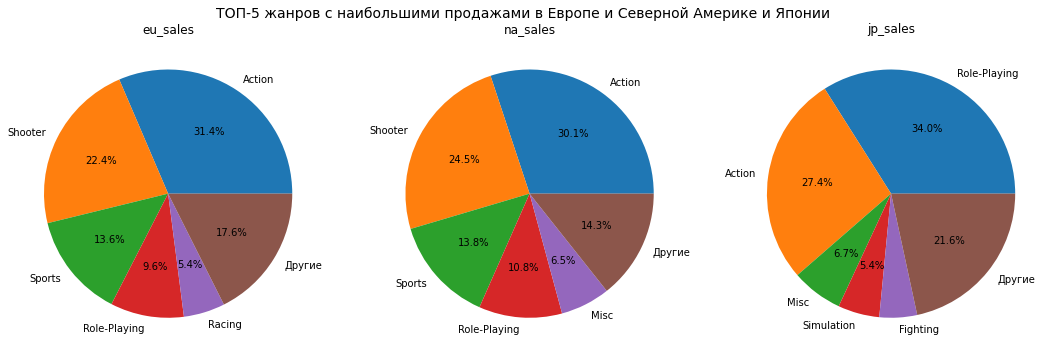

In [47]:
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']
fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
for i, region in enumerate(regions_sales):
    region_platform = actual_df.query('year_of_release >= 2012').groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
    region_top_platform = region_platform.head(6)        
    ax[i].pie(region_top_platform[region], labels=region_top_platform['genre'], autopct=lambda x: f'{x:.1f}%' if x > 5 else None)
    ax[i].set_title(region)
plt.suptitle('ТОП-5 жанров с наибольшими продажами в Европе и Северной Америке и Японии', fontsize=14)
plt.tight_layout()
plt.show()

В Северной Америке и Европе совпадают топ-4 жанра: Action, Shooter, Sports и Role-Playing. В Японии лидирует жанр Role-Playing, хотя также очень популярны Action, Misc и Simulation.

### Влияние рейтинга ESRB на продажи 

In [48]:
esrb_sale = actual_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', \
                                                                                       ascending=False).reset_index()
esrb_sale

/tmp/ipykernel_64/3438978416.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  esrb_sale = actual_df.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', \


,rating,na_sales,eu_sales,jp_sales
0,M,231.57,193.96,21.20
1,E,114.37,113.03,28.33
2,unknown,103.31,91.50,108.84
3,E10+,75.70,55.37,8.19
4,T,66.02,52.96,26.02


Исходя из представленной таблицы основными рейтингами являются: 'Е', 'T', 'M' и 'E10+' (остальные 4 являются не очень популярными, поэтому мы не будем учитывать их в анализе). Можно отметить, что влияние рейтинга на продажи в разных регионах практически одинаково: 'M', 'E', 'E10+' и 'T'. В Японии чаще всего покупают игру без рейтинга. Возможно предположить, что данный для локальных игр рейтинг устанавливаетcя другой организацией (не ESRB).

### Проверка гипотез

Гипотеза № 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

    H0: Средние пользовательские рейтинги платформы Xbox One =  Средние пользовательские рейтинги платформы PC.
    H1: Средние пользовательские рейтинги платформы Xbox One ≠  Средние пользовательские рейтинги платформы PC.

In [49]:
XOne = actual_df.query('platform == "XOne" & year_of_release >= 2012')['user_score'].dropna().to_list()
PC = actual_df.query('platform == "PC"& year_of_release >= 2012')['user_score'].dropna().to_list()

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(XOne, 
    PC, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.056197655897620345
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу - это значит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза № 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

    H0: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры)  =  Средние пользовательские рейтинги жанра Sports (англ. «спортивные соревнования»).
    H1: Средние пользовательские рейтинги жанра Action (англ. «действие», экшен-игры)  ≠  Средние пользовательские рейтинги жанров Sports (англ. «спортивные соревнования»).

In [50]:
Action = actual_df.query(' genre == "Action" & year_of_release >= 2012')['user_score'].dropna().to_list()
Sports = actual_df.query(' genre == "Sports" & year_of_release >= 2012')['user_score'].dropna().to_list()
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(Action, 
    Sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0020018212594614467
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу - это значит, что средние пользовательские рейтинги жанров Action и Sports разные.

В ходе проверки гипотез получилось следующее: 
Гипотеза № 1 (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые) - не отвергнута.
Гипотеза № 2 (Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные) - не отвергнута. 

### Общий вывод

В ходе исследования было выявлено, что данные cодержат достаточно большое количество пропусков, однако не по всем переменным. Больше всего пропущенных значений в переменных 'ctitic_score', 'user_score' и 'rating'. Часть пропусков датасета была заменена средним значением, часть удалена, а часть оставлена в неизменном виде. Дубликатов не выявлено. Был добавлен столбец total_sales с суммой всех продаж в регионах. Были изменены типы данных некоторых столбцов - 'year_of_release' и 'critic_score' в тип int, 'user_score' в тип float.

        Было выявлено, что до начала 2000-х выпускалось мало игр. Значительный рост пришел на начало 21 века в связи с научно-техническим прогрессом - тогда начинается бум и компьютерные игры захватывают мир. Пик популярности видеоигр пришел на 2009 год, что может быть связано с тем, что больше людей в мире стали приобретать персональные компьютеры. Значительный спад произошел в 2010-2016 гг.
        Cрок иактивного существования платформ в среднем равен 11 лет. По прогнозу на 2017 год можно сказать следующее: Многие популярные платформы (Wii, PS3, X360, PSP) прошли свой цикл развития 11 лет и 2016 год является завершающим для них, поэтому в данные платформы вкладываться не стоит. Необходимо Развивать необходимо платформы PS4 и XOne, которые появились в 2013 году и уже в 2014 и 2015 продемонстрировали рост. Зависимость продаж прямопропорцианальная - от оценки критиков слабая, но сильнее, чем от оценки пользователей.
        Общее распределение игр по жанрам является следующим: лидируют Action, Role-Playing, Adventure и Sports; наименее популярные жанры -  Puzzle, Strategy и Simulation. В продажах по жанрам лидируют также Action, Shooter, Role-Playing и Sports; наименее популярные жанры по продажам: Strategy, Puzzle и Adventure. При этом наиболее прибыльным жанрам по медианному значению является Shooter.


Был составлен портрет пользователя каждого региона:

    Лидеры продаж во всех регионах разные: в Европе - PS4, в Северной Америке - X360 в Японии - 3DS. В Европе популярны PS3, X360. В Северной Америке популярны PS4 и PS3. В Японии более популярны платформы 3DS, PS3 и PSV.
    В Северной Америке и Европе совпадают топ-4 жанра: Action, Shooter, Sports и Role-Playing. В Японии лидирует жанр Role-Playing, хотя также очень популярны Action, Misc и Simulation.
    Исходя из представленной таблицы основными рейтингами являются: 'Е', 'T', 'M' и 'E10+' (остальные 4 являются не очень популярными, поэтому мы не будем учитывать их в анализе). Можно отметить, что влияние рейтинга на продажи в разных регионах практически одинаково: 'M', 'E', 'E10+' и 'T'. В Японии чаще всего покупают игру без рейтинга. Возможно предположить, что данный для локальных игр рейтинг устанавливаетcя другой организацией (не ESRB).

По заданию необходиммо было проверить две гипотезы. Гипотезы не отвергнуты:

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Средние пользовательские рейтинги жанров Action и Sports разные.
